# Decision Trees

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

1. from anaconda terminal: pip install pydotplus
2. from anaconda terminal: conda install pydotplus
3. from anaconda terminal: pip install graphviz
4. from anaconda terminal:conda install graphviz

## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
file_path = Path("../Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()



,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [23]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


The features set X contains all of the df_loans columns except the bad column.
The bad column is the target variable y, where 1 means that the loan application was fraudulent, and 0 that it wasn't

In [24]:
# Define target vector:
y = df_loans["bad"].values.reshape(-1,1)
y[:5]


array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [25]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [26]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [27]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

Super Imp. Always scale the features of X never y. There is no need to scale the target data since it contains the labels that we want to predict using the decision tree

In [28]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [29]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()


In [30]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

In [31]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)


## Model Evaluation

In [32]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [33]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,23,18


Accuracy Score : 0.544
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.60      0.64        84
           1       0.35      0.44      0.39        41

    accuracy                           0.54       125
   macro avg       0.52      0.52      0.51       125
weighted avg       0.57      0.54      0.55       125



## Visualizing the Decision Tree

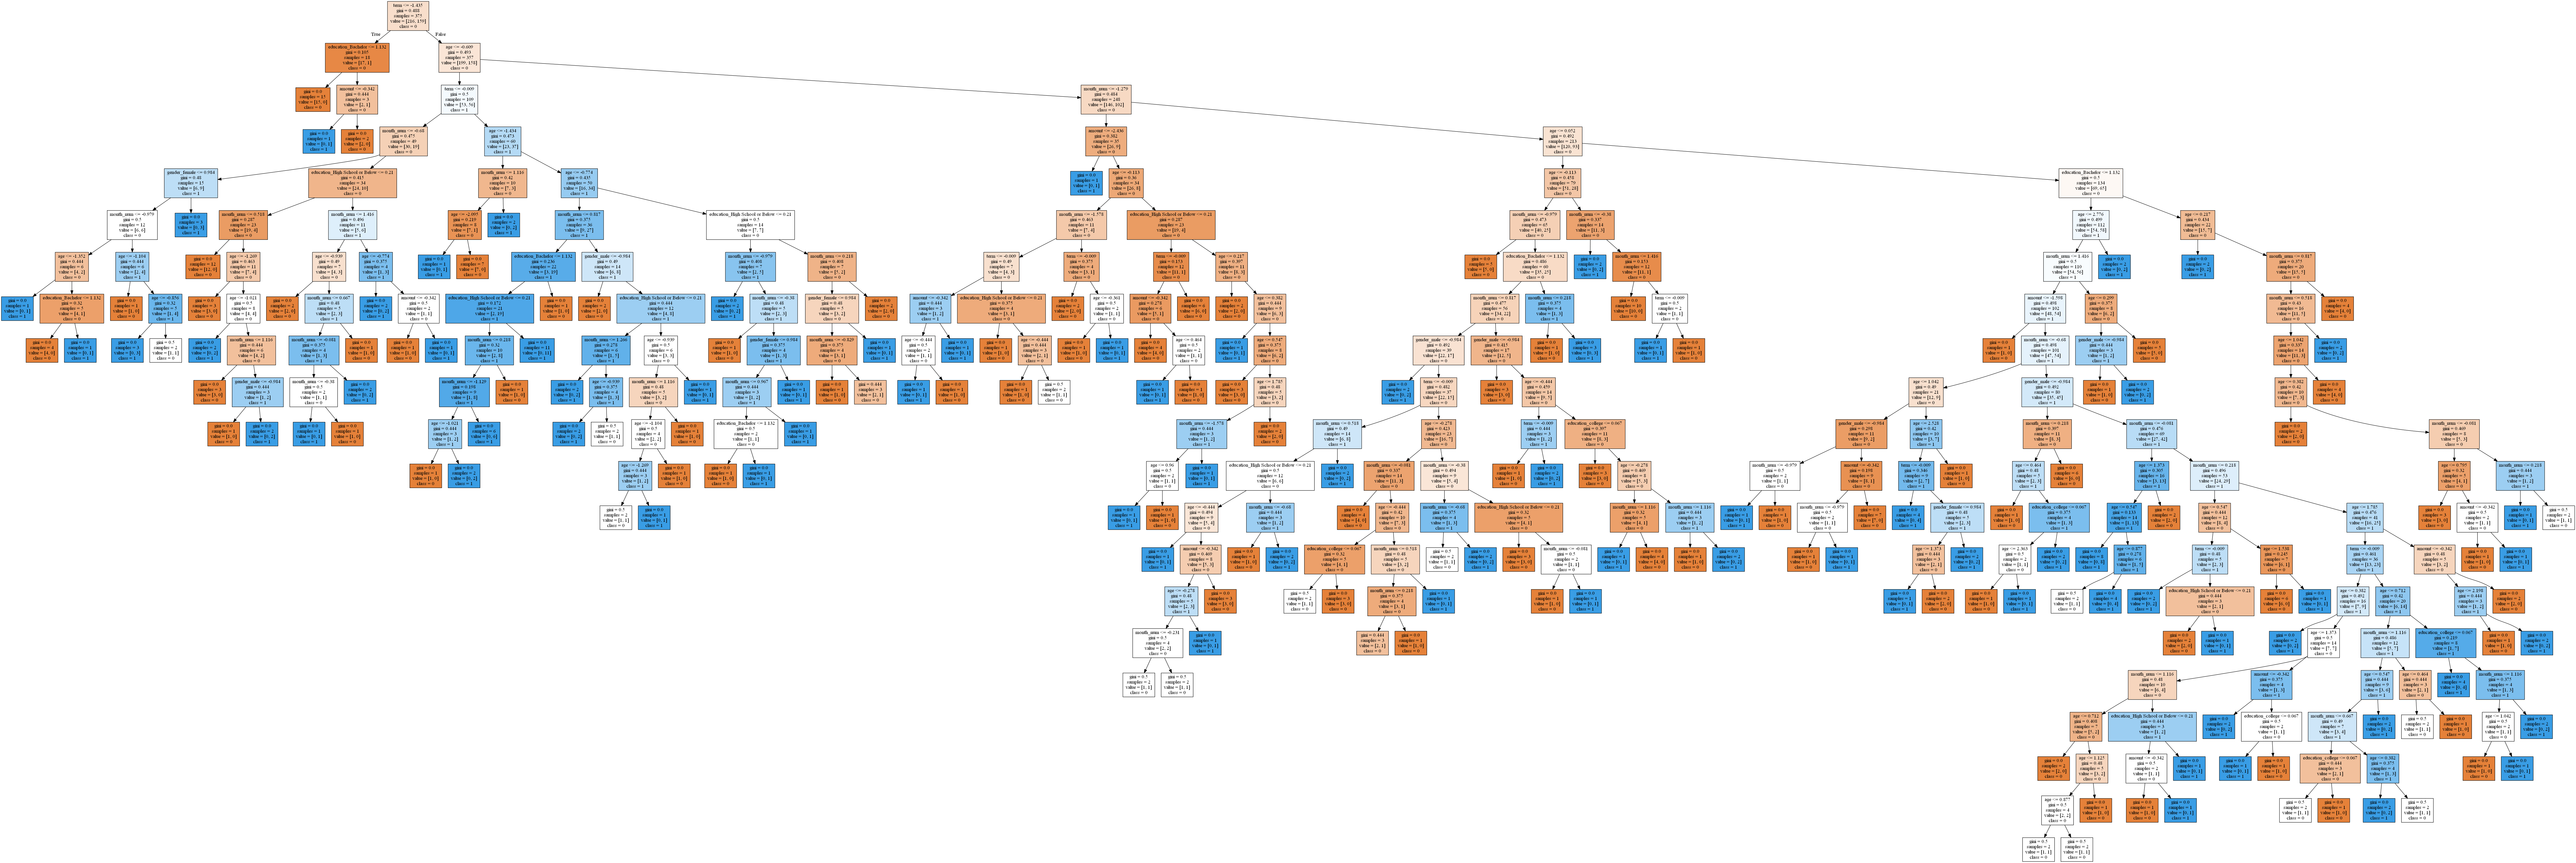

In [34]:
# Create DOT data
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [35]:
# Saving the tree as PDF
file_path = ("../Resources/loans_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("../Resources/loans_tree.png")
graph.write_png(file_path)


True